# Simple Forecast Methods
Author: Geovanna Santos Nobre de Oliveira

In [36]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math
import rforecastwrappers 

In [8]:
plt.rcParams['figure.figsize'] = [15, 5]

In [20]:
macro_data = sm.datasets.macrodata.load_pandas()
macro_data = macro_data.data
macro_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Plotting the original data

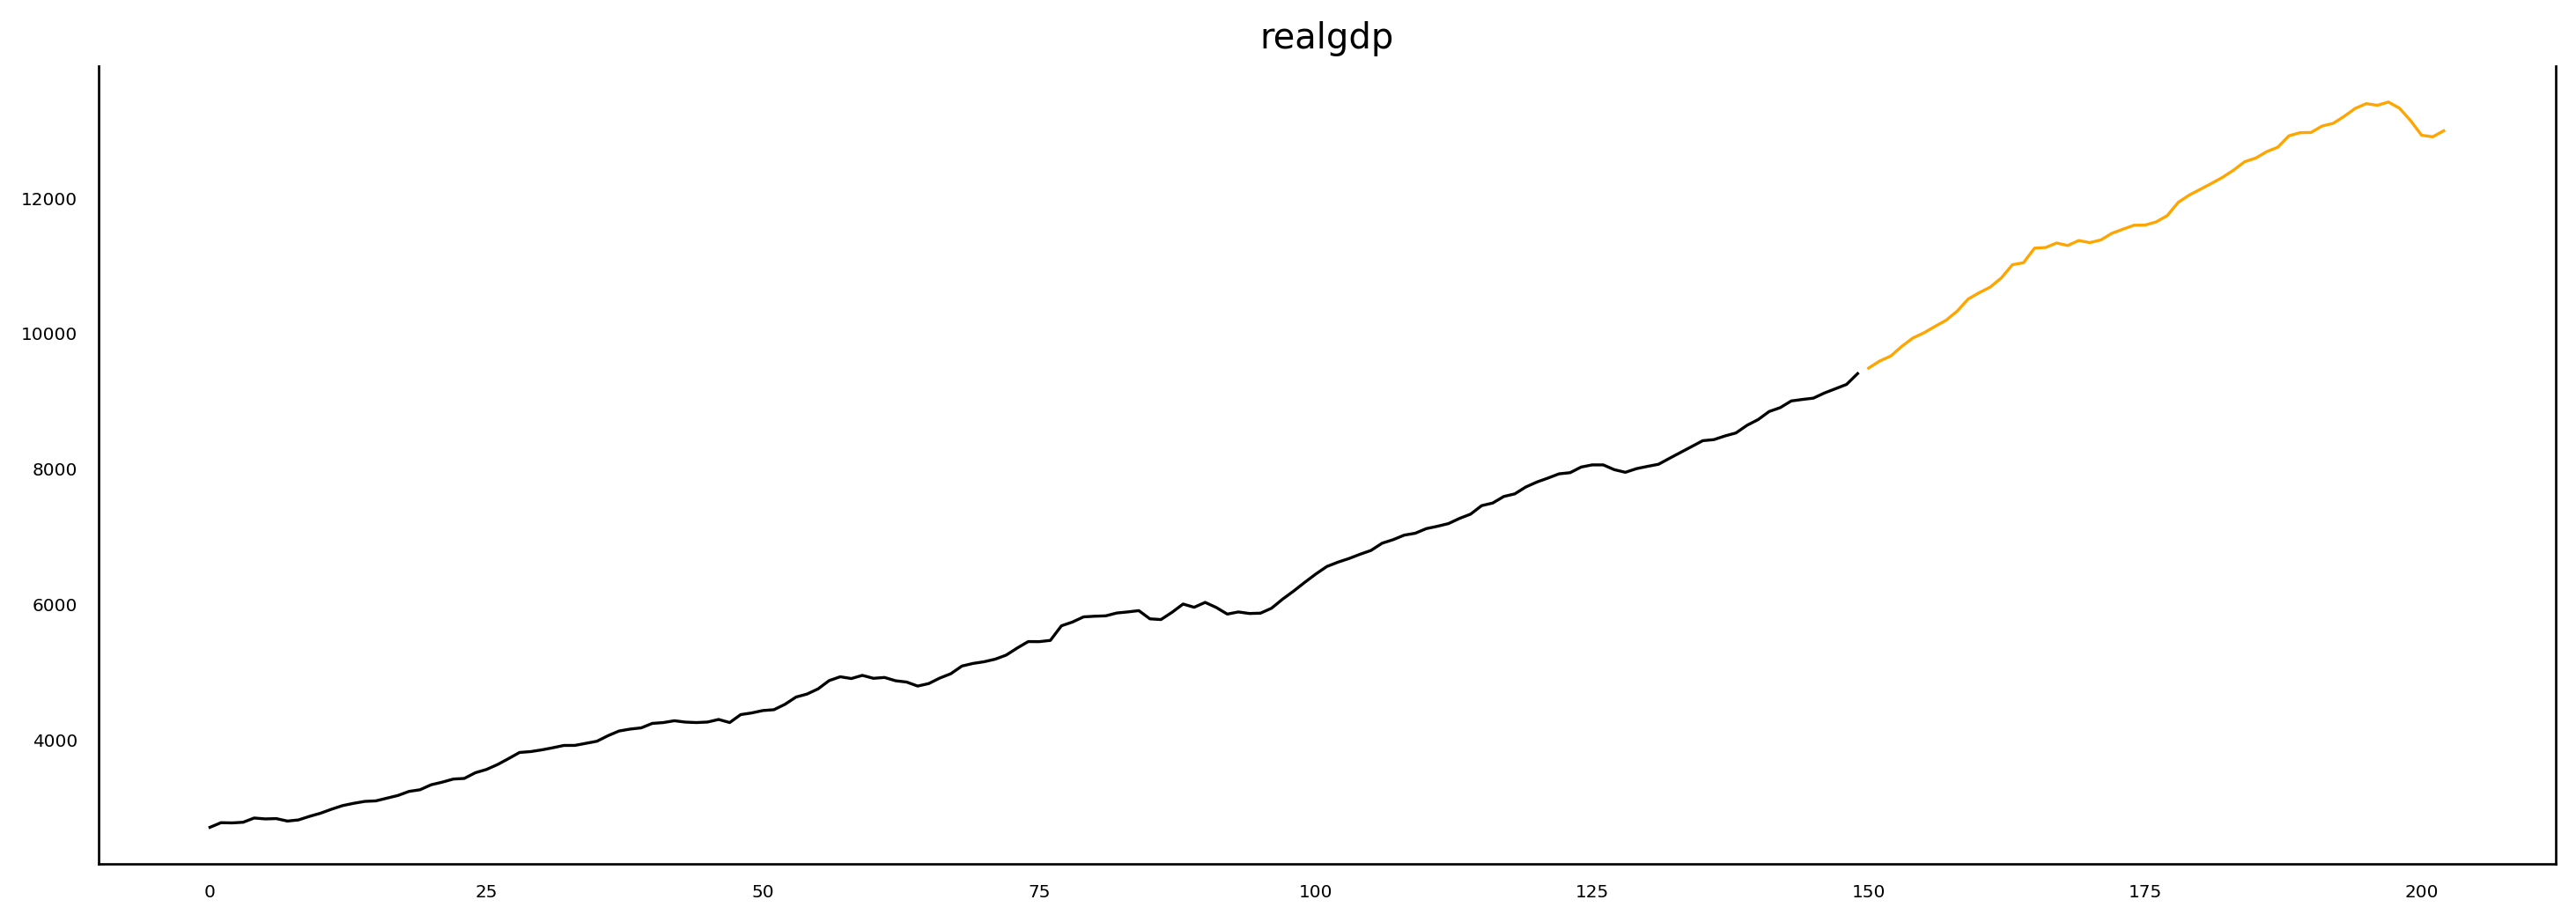

In [21]:
len_training = 150

fig, ax = plt.subplots(dpi=240)

ax.plot(macro_data['realgdp'][:len_training], color='black', linewidth=1)
ax.plot(macro_data['realgdp'][len_training:], color='orange', linewidth=1)
ax.set_title('realgdp')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines['top'].set_alpha(0)
ax.tick_params(labelsize=6)

## Average Method

In [67]:
len_total = len(macro_data['realgdp'])

predicted = [np.mean(macro_data['realgdp'][:len_training])]*len_total
idx = np.arange(len_total)

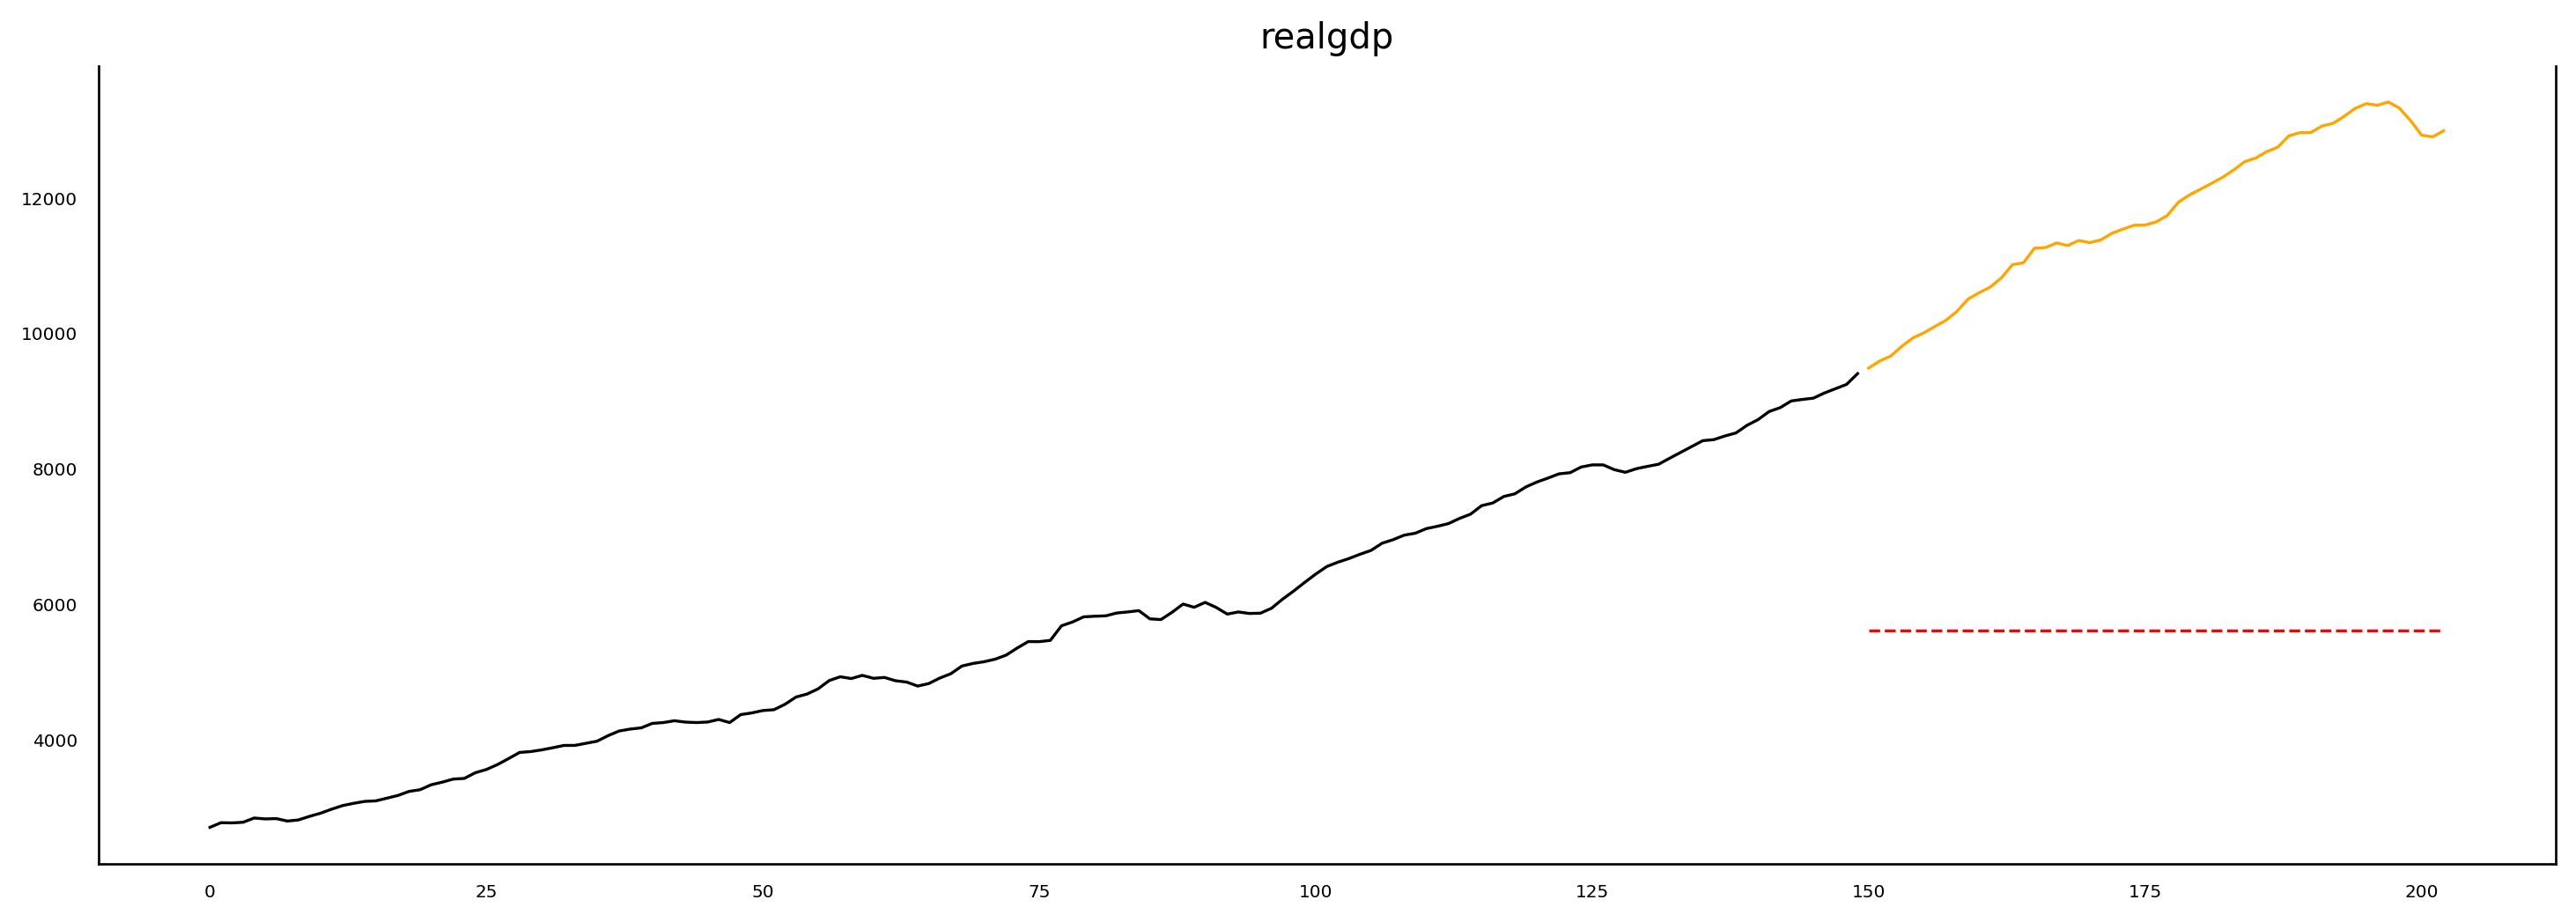

In [26]:
fig, ax = plt.subplots(dpi=240)

ax.plot(macro_data['realgdp'][:len_training], color='black', linewidth=1)
ax.plot(macro_data['realgdp'][len_training:], color='orange', linewidth=1)
ax.plot(idx[len_training:], 
         predicted[len_training:], 
         color='red',
         ls='--',
         linewidth=1
         )
ax.set_title('realgdp')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines['top'].set_alpha(0)
ax.tick_params(labelsize=6)

## Naive Method

In [27]:
predicted = [macro_data['realgdp'][len_training-1]]*len_total

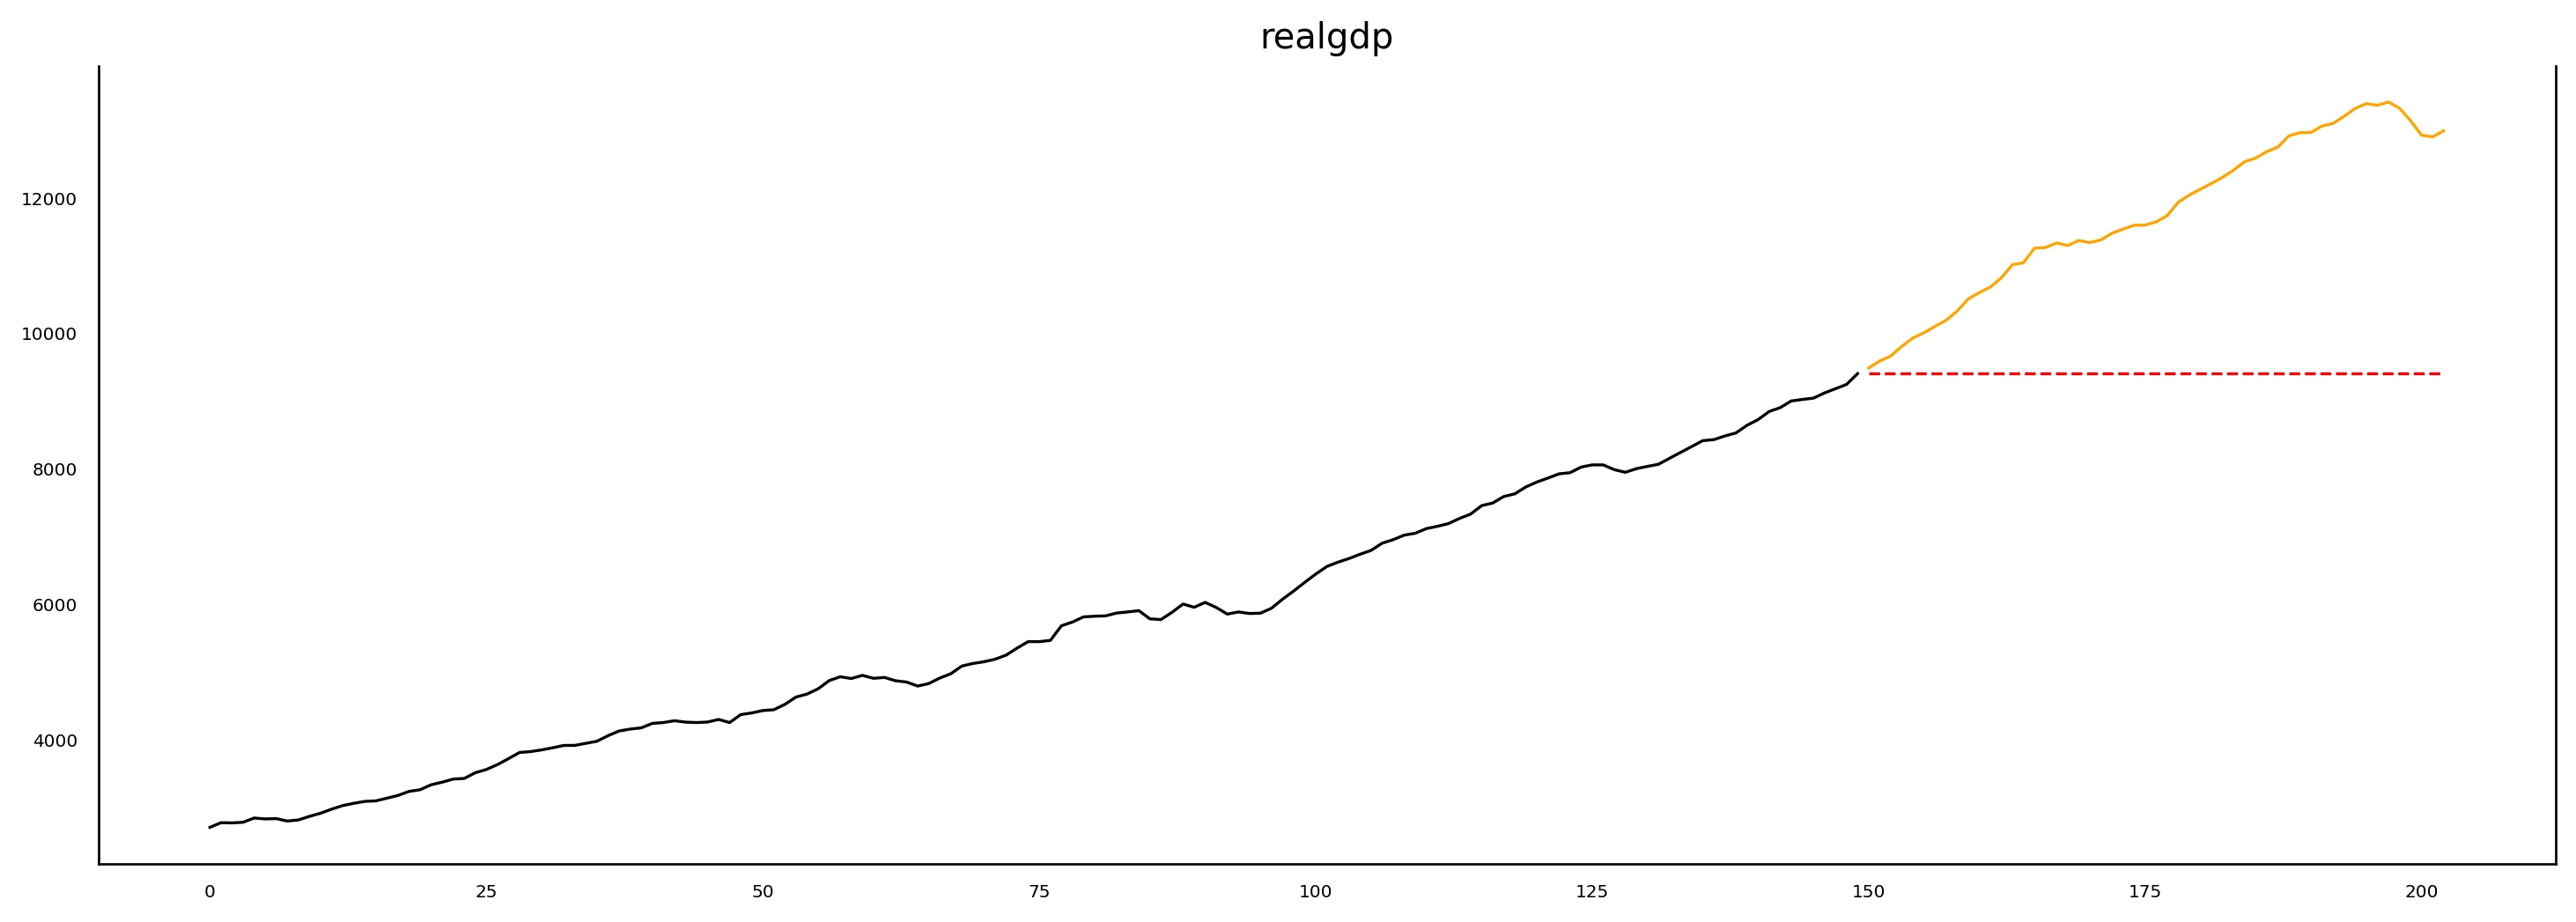

In [28]:
fig, ax = plt.subplots(dpi=240)

ax.plot(macro_data['realgdp'][:len_training], color='black', linewidth=1)
ax.plot(macro_data['realgdp'][len_training:], color='orange', linewidth=1)
ax.plot(idx[len_training:], 
         predicted[len_training:], 
         color='red',
         ls='--',
         linewidth=1
         )
ax.set_title('realgdp')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines['top'].set_alpha(0)
ax.tick_params(labelsize=6)

## Seasonal Naive Method
Here we don't have a seasonal component, but let's assume we have a quarterly season

In [63]:
n_season = 4

predicted = np.tile(macro_data['realgdp'][len_training-n_season:len_training],math.ceil(len_total/n_season))[:len_total]

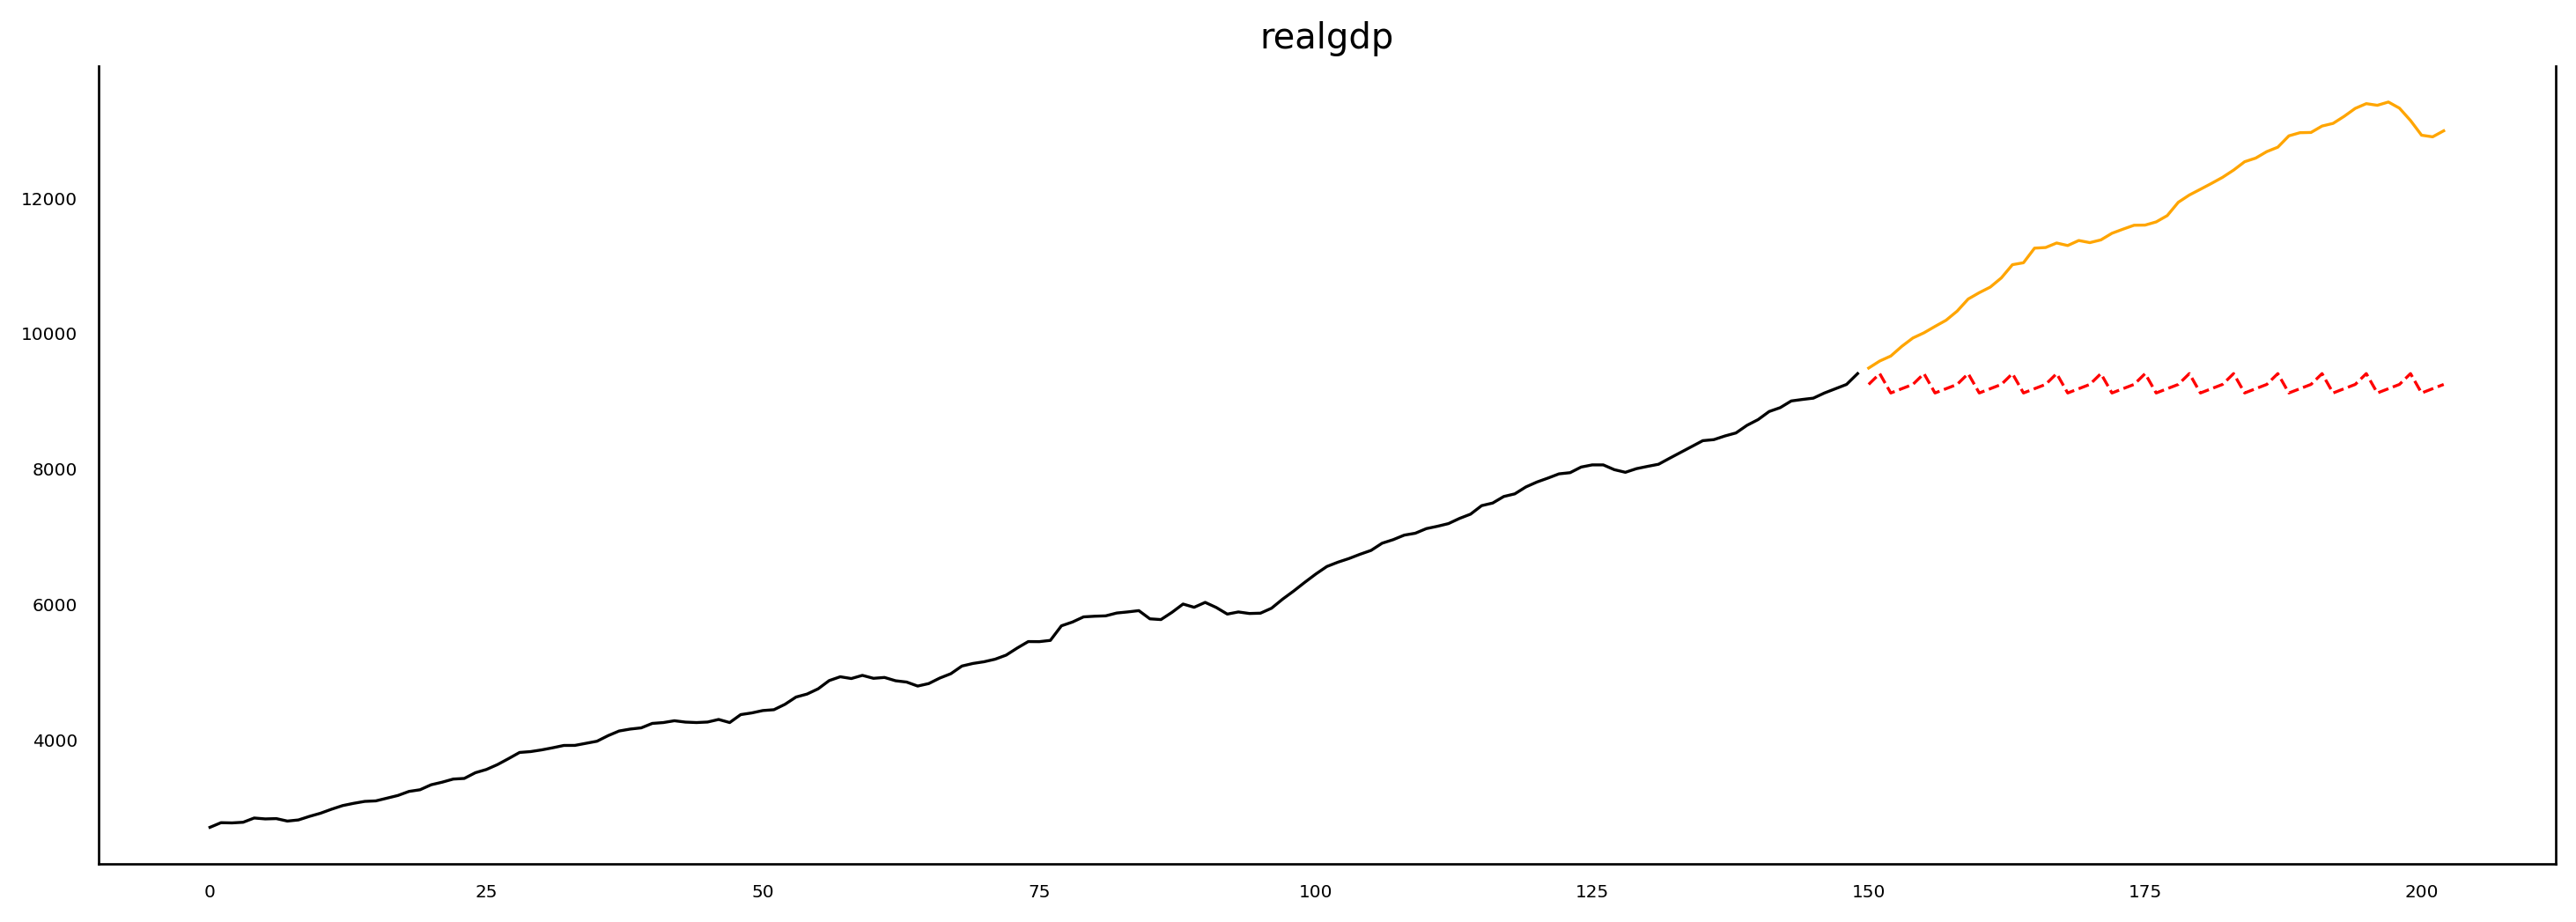

In [66]:
fig, ax = plt.subplots(dpi=240)

ax.plot(macro_data['realgdp'][:len_training], color='black', linewidth=1)
ax.plot(macro_data['realgdp'][len_training:], color='orange', linewidth=1)
ax.plot(idx[len_training:], 
         predicted[len_training:], 
         color='red',
         ls='--',
         linewidth=1
         )
ax.set_title('realgdp')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines['top'].set_alpha(0)
ax.tick_params(labelsize=6)

## Drif Method

y = a*x + b

In [77]:
a = (macro_data['realgdp'][len_training-1] - macro_data['realgdp'][0])/(len_training-1)
b = macro_data['realgdp'][len_training-1] - (len_training-1)*a

predicted = idx*a + b

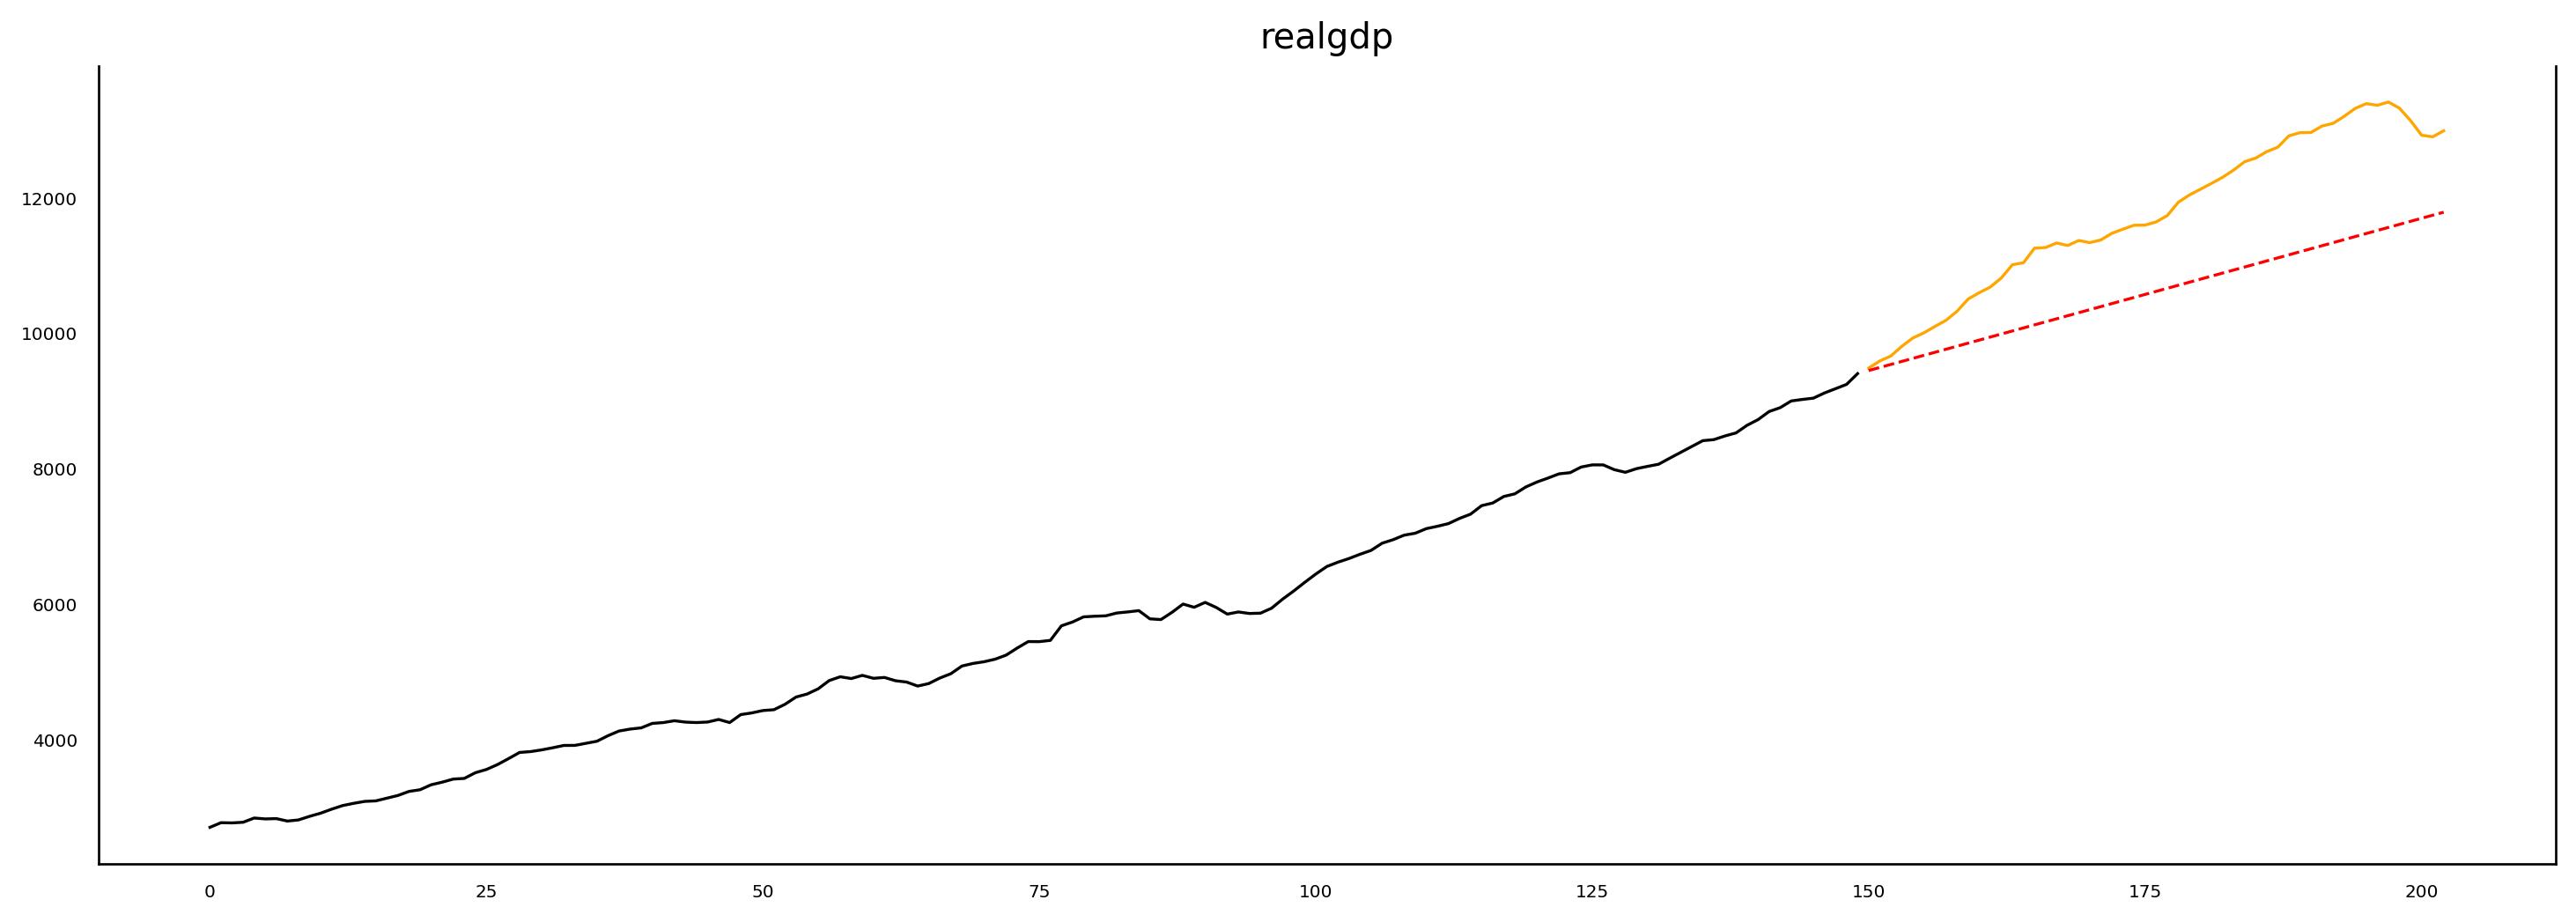

In [83]:
fig, ax = plt.subplots(dpi=240)

ax.plot(macro_data['realgdp'][:len_training], color='black', linewidth=1)
ax.plot(macro_data['realgdp'][len_training:], color='orange', linewidth=1)
ax.plot(idx[len_training:], 
         predicted[len_training:], 
         color='red',
         ls='--',
         linewidth=1
         )
ax.set_title('realgdp')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.spines['top'].set_alpha(0)
ax.tick_params(labelsize=6)